In [1]:
import inspect
from berny import Berny, geomlib, coords,Geometry
from aaff import aaff,alc_deriv_grad_nuc,alc_differential_grad_nuc
from FcMole import FcM
from alch_deriv import alch_deriv
from pyscf import gto,scf
import numpy as np
import ipyvolume as ipv
from numpy.linalg import norm as norm
from scipy.optimize import  minimize
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pyscf.grad import rhf as grhf
from pyscf.hessian import rhf as hrhf
import basis_set_exchange as bse
from FDcoeffs import *
from pyscf.geomopt.berny_solver import optimize
ang2bohr=1.8897261246
bohr2ang=.5291772109

In [2]:
help(Berny)

Help on class Berny in module berny.berny:

class Berny(collections.abc.Generator)
 |  Berny(geom, debug=False, restart=None, maxsteps=100, logger=None, **params)
 |  
 |  Generator that receives energy and gradients and yields the next geometry.
 |  
 |  Args:
 |      geom (:class:`~berny.Geometry`): geometry to start with
 |      debug (bool): if :data:`True`, the generator yields debug info on receiving
 |          the energy and gradients, otherwise it yields :data:`None`
 |      restart (dict): start from a state saved from previous run
 |          using ``debug=True``
 |      maxsteps (int): abort after maximum number of steps
 |      logger (:class:`logging.Logger`): alternative logger to use
 |      params: parameters that override the :data:`~berny.berny.defaults`
 |  
 |  The Berny object is to be used as follows::
 |  
 |      optimizer = Berny(geom)
 |      for geom in optimizer:
 |          # calculate energy and gradients (as N-by-3 matrix)
 |          debug = optimizer.s

In [3]:
#HF=gto.M(atom="F 0 0 0;H 0 0 1.695741",unit="bohr",

In [4]:
HF=gto.M(atom="F 0 0 0;H 0 0 1.85741",unit="bohr",
            basis={"H":"pc-2",'F':bse.get_basis("pcX-2",fmt="nwchem",elements=[9])})
mfhf = scf.RHF(HF)
mfhf.scf()
g=mfhf.Gradients().grad()

converged SCF energy = -100.0577866084
--------------- RHF gradients ---------------
         x                y                z
0 F    -0.0000000000    -0.0000000000    -0.0867765107
1 H     0.0000000000     0.0000000000     0.0867765107
----------------------------------------------


In [5]:
dir(HF)

['__add__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_suffix',
 '_atm',
 '_atom',
 '_bas',
 '_basis',
 '_build_symmetry',
 '_built',
 '_ecp',
 '_ecpbas',
 '_enuc',
 '_env',
 '_keys',
 '_libcint_ctr_coeff',
 '_nao',
 '_nelectron',
 '_pseudo',
 '_symm_axes',
 '_symm_orig',
 'ao2mo',
 'ao_labels',
 'ao_loc',
 'ao_loc_2c',
 'ao_loc_nr',
 'aoslice_2c_by_atom',
 'aoslice_by_atom',
 'aoslice_nr_by_atom',
 'apply',
 'atom',
 'atom_charge',
 'atom_charges',
 'atom_coord',
 'atom_coords',
 'atom_mass_list',
 'atom_nelec_core',
 'atom_nshells',
 'atom_pure_symbol',
 'atom_shell_ids',
 'atom_symbol',
 'bas_angular',
 'bas_a

In [6]:
HF.atom_pure_symbol(0)

'F'

In [7]:
HF.atom_symbol(0)

'F'

In [69]:
hfc=HF.atom_coords()*bohr2ang
HF.atom,1.85741*bohr2ang

('F 0 0 0;H 0 0 1.85741', 0.982899043297769)

In [70]:
pbg=Geometry([HF.atom_symbol(x) for x in range(HF.natm)],hfc)

In [71]:
pbg.masses,pbg.formula,pbg.coords

(array([18.9984,  1.0079]), 'FH', array([[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.98289904]]))

In [72]:
b=Berny(pbg,debug=True)
mfhf.e_tot

-100.05778660840022

In [74]:
b.send((mfhf.e_tot,g))

{'geom': <Geometry 'FH'>,
 'params': {'gradientmax': 0.00045,
  'gradientrms': 0.00015,
  'stepmax': 0.0018,
  'steprms': 0.0012,
  'trust': 0.3,
  'dihedral': True,
  'superweakdih': False},
 'trust': 0.3,
 'coords': <InternalCoords "bonds: 1, angles: 0, dihedrals: 0">,
 'H': array([[0.4964612]]),
 'weights': array([1.10324712]),
 'future': Point(q=array([1.68765667]), E=None, g=None),
 'first': False,
 'interpolated': Point(q=array([1.85741]), E=-100.05778660840022, g=array([0.08677651])),
 'predicted': Point(q=array([1.68765667]), E=-100.06536414910714, g=None),
 'previous': Point(q=array([1.85741]), E=-100.05778660840022, g=array([0.08677651])),
 'best': Point(q=array([1.85741]), E=-100.05778660840022, g=array([0.08677651]))}

In [42]:
l=[x for x in enumerate(b)]

In [49]:
l[-1][1].coords,l[-10][1].coords

(array([[0.        , 0.        , 0.0449148 ],
        [0.        , 0.        , 0.93798425]]),
 array([[0.        , 0.        , 0.0449148 ],
        [0.        , 0.        , 0.93798425]]))

In [27]:
pbg.coords

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.98289904]])

In [32]:
hfc

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.98289904]])

In [33]:
b._state.geom.coords

array([[0.        , 0.        , 0.0449148 ],
       [0.        , 0.        , 0.93798425]])

In [35]:
(0.93798425-0.0449148)*ang2bohr

1.6876566707471532

In [67]:
b._state.coords.B_matrix(pbg)

array([[ 0.,  0., -1.,  0.,  0.,  1.]])

In [55]:
print(dir((b._state.coords.hessian_guess)))

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [51]:
print(dir(b._state))

['H', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'best', 'coords', 'first', 'future', 'geom', 'interpolated', 'params', 'predicted', 'previous', 'trust', 'weights']


In [75]:
s=b._state

In [76]:
 s.predicted.E

-100.06536414910714

In [77]:
pbg.formula

'FH'

In [78]:
s.H

array([[0.4964612]])

In [81]:
s.coords.__str__()

'Internal coordinates:\n* Number of fragments: 1\n* Number of internal coordinates: 1\n* Number of strong bonds: 1'

In [82]:
c=s.coords

In [83]:
print(dir(c))

['B_matrix', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_coords', '_reduce', 'angles', 'append', 'bonds', 'dict', 'dihedrals', 'eval_geom', 'extend', 'fragments', 'hessian_guess', 'update_geom', 'weights']


In [85]:
c.bonds

[Bond(0, 1, weak=0)]

In [86]:
c.fragments

[[0, 1]]

$$ \rho_{ij}:=\exp\big(-R_{ij}/(R_i^\text{cov}+R_j^\text{cov})+ 1 \big)$$
$\rho_{ij}=1$ for $R_{ij} = R_i^\text{cov}+R_j^\text{cov}$

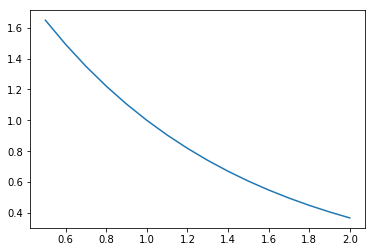

In [94]:
plt.plot([x for x in np.linspace(0.5,2,16)],[np.exp(-x+1) for x in np.linspace(0.5,2,16)])

In [88]:
pbg.rho()

array([[0.        , 1.10324712],
       [1.10324712, 0.        ]])

In [98]:
0.45*1.10324712

0.49646120400000004

In [99]:
s.H

array([[0.4964612]])

In [101]:
pbg.dist(pbg)

array([[       inf, 0.98289904],
       [0.98289904,        inf]])

In [103]:
hfc

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.98289904]])

In [102]:
c.B_matrix(pbg)

array([[ 0.,  0., -1.,  0.,  0.,  1.]])

In [106]:
s.interpolated.q,s.predicted.q

(array([1.85741]), array([1.68765667]))

State contains the cool variables printed out after b.send

In [134]:
h2o=gto.M(atom="O 0 0 0; H 0 -0.6 .3; H 0 0.6 .3")

In [153]:
np.sqrt(5)*.3

0.6708203932499369

In [ ]:
2.39554311

In [135]:
geom2=Geometry([h2o.atom_symbol(x) for x in range(h2o.natm)],h2o.atom_coords())

In [136]:
b2=Berny(geom2)

In [147]:
vars(b2._state)

{'geom': <Geometry 'H2O'>,
 'params': {'gradientmax': 0.00045,
  'gradientrms': 0.00015,
  'stepmax': 0.0018,
  'steprms': 0.0012,
  'trust': 0.3,
  'dihedral': True,
  'superweakdih': False},
 'trust': 0.3,
 'coords': <InternalCoords "bonds: 2, angles: 1, dihedrals: 0">,
 'H': array([[0.3904131 , 0.        , 0.        ],
        [0.        , 0.3904131 , 0.        ],
        [0.        , 0.        , 0.11290547]]),
 'weights': array([0.86758466, 0.86758466, 0.71488976]),
 'future': Point(q=array([2.39554311, 2.39554311, 2.21429744]), E=None, g=None),
 'first': True}

In [160]:
print(dir(b2._state.geom))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'bondmatrix', 'cms', 'coords', 'copy', 'dist', 'dist_diff', 'dump', 'dumps', 'formula', 'from_atoms', 'inertia', 'lattice', 'masses', 'rho', 'species', 'super_circum', 'supercell', 'write']


In [165]:
b2._state.geom.

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        , -1.13383567,  0.56691784],
       [ 0.        ,  1.13383567,  0.56691784]])

In [140]:
vars(b2._state.coords)

{'_coords': [Bond(0, 1, weak=0), Bond(0, 2, weak=0), Angle(1, 0, 2, weak=0)],
 'fragments': [[0, 1, 2]]}

In [155]:
b2._state.coords._coords

[Bond(0, 1, weak=0), Bond(0, 2, weak=0), Angle(1, 0, 2, weak=0)]

In [146]:
vars(b2._state.coords._coords[0])

{'i': 0, 'j': 1, 'idx': (0, 1), 'weak': 0}

In [148]:
b2._state.H

array([[0.3904131 , 0.        , 0.        ],
       [0.        , 0.3904131 , 0.        ],
       [0.        , 0.        , 0.11290547]])

In [151]:
vars(geom2)

{'species': ['O', 'H', 'H'],
 'coords': array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        , -1.13383567,  0.56691784],
        [ 0.        ,  1.13383567,  0.56691784]]),
 'lattice': None}